<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/Calories_Burnt_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Importing libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [40]:
# Data Collection -> From Kaggle
#Loading calories dataset using pandas Dataframe
cal_dataset = pd.read_csv("/content/calories.csv")
print('Calories Datasets first 5 row :\n ',cal_dataset.head(),'\n')

#Loading exercise dataset using pandas Dataframe

exercise_dataset = pd.read_csv("/content/exercise.csv")
print('Exercise Datasets first 5 row :\n ',exercise_dataset.head(),'\n')

Calories Datasets first 5 row :
      User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0 

Exercise Datasets first 5 row :
      User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8 



In [41]:
# Combining two Dataframes

calories_dataset = pd.concat([exercise_dataset, cal_dataset['Calories']],axis=1)
print(" Combing two Datasets : \n",calories_dataset.head(),'\n')
print('Number of rows and columns : \n',calories_dataset.shape)


 Combing two Datasets : 
     User_ID  Gender  Age  Height  ...  Duration  Heart_Rate  Body_Temp  Calories
0  14733363    male   68   190.0  ...      29.0       105.0       40.8     231.0
1  14861698  female   20   166.0  ...      14.0        94.0       40.3      66.0
2  11179863    male   69   179.0  ...       5.0        88.0       38.7      26.0
3  16180408  female   34   179.0  ...      13.0       100.0       40.5      71.0
4  17771927  female   27   154.0  ...      10.0        81.0       39.8      35.0

[5 rows x 9 columns] 

Number of rows and columns : 
 (15000, 9)


In [42]:
#Getting some information about data
print(calories_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [43]:

# checking for missing value
print("Missing value : \n",calories_dataset.isnull().sum(),'\n')

Missing value : 
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64 



In [44]:
# Data Analysis-------->part..
# Measure some statistical info
print(' Statistical info : \n',calories_dataset.describe(),'\n')

 Statistical info : 
             User_ID           Age  ...     Body_Temp      Calories
count  1.500000e+04  15000.000000  ...  15000.000000  15000.000000
mean   1.497736e+07     42.789800  ...     40.025453     89.539533
std    2.872851e+06     16.980264  ...      0.779230     62.456978
min    1.000116e+07     20.000000  ...     37.100000      1.000000
25%    1.247419e+07     28.000000  ...     39.600000     35.000000
50%    1.499728e+07     39.000000  ...     40.200000     79.000000
75%    1.744928e+07     56.000000  ...     40.600000    138.000000
max    1.999965e+07     79.000000  ...     41.500000    314.000000

[8 rows x 8 columns] 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


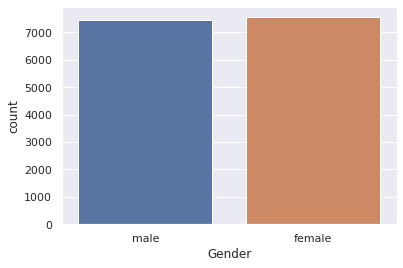

In [45]:
# Data Visualization ------> part
sns.set()
sns.countplot(calories_dataset['Gender'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


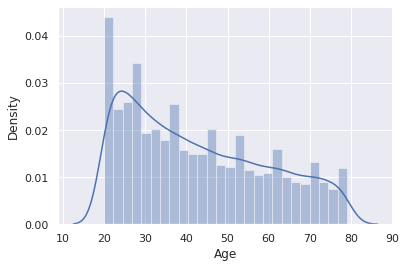

In [46]:
# finding distribution of Age column
print(sns.distplot(calories_dataset['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


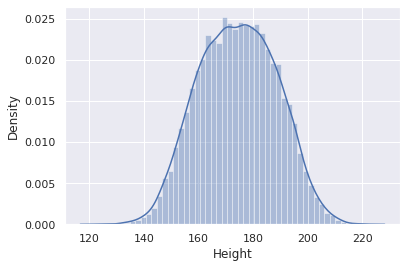

In [47]:
# finding distribution of "Height" column
print(sns.distplot(calories_dataset['Height']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


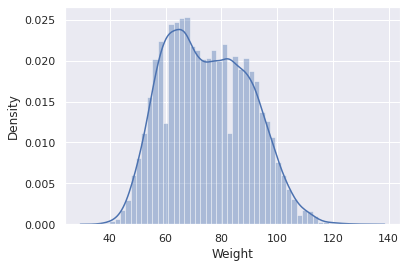

In [48]:
# finding distribution of "weight" column
print(sns.distplot(calories_dataset['Weight']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


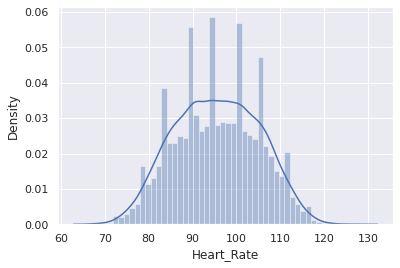

In [49]:
# finding distribution of "Heart_Rate" column
print(sns.distplot(calories_dataset['Heart_Rate']))

# **Correlation has two type:**

1.Positive

2.Negative

In [50]:
# Finding Correlation in the dataset

correlation = calories_dataset.corr()

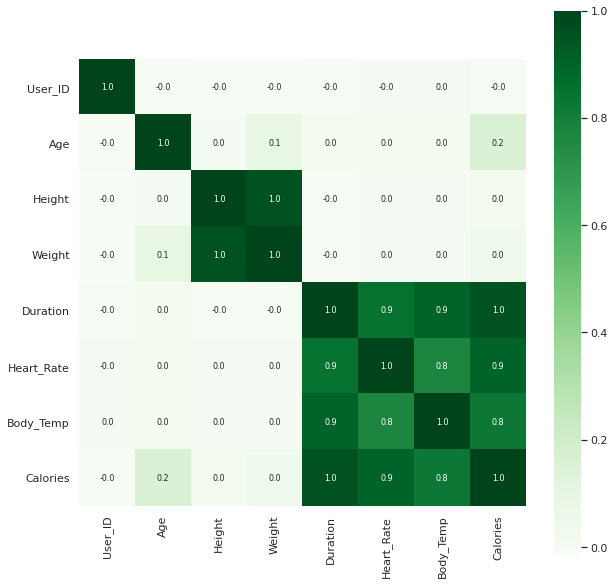

In [51]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,
            annot_kws={'size':8},cmap="Greens")

In [52]:
#Converting text to numerical values
calories_dataset.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [53]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [54]:
#Separating feature and Target

x=calories_dataset.drop(columns=['User_ID','Calories'],axis=1)
y=calories_dataset['Calories']
print(x,y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns] 0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [65]:
#spliting test and training data
x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.2,random_state=2)

print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [56]:
# Model(XGBoost Regrassor) training
#loading model
model=XGBRegressor()

In [75]:
#training the model
model.fit(x_train,y_train)

[15:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [76]:
x_train_prediction=model.predict(x_train)

print(x_train_prediction)

[  9.806499  35.532837  28.32333  ... 102.74845  179.59464   44.3327  ]


In [58]:
# Evaluation---->part
#Prediction

test_data_prediction=model.predict(x_test)
print(test_data_prediction)


[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


# Mean Absolute Error

In [59]:
m=metrics.mean_absolute_error(y_test,test_data_prediction)

print("Mean Absolute Error : ",m)

Mean Absolute Error :  2.7159012502233186


In [60]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.9963065655529431


In [72]:
input_data=[1,20,166.0,60.0,14.0,94.0,40.3]
input_data_as_numpy_array = np.asarray(input_data)

In [78]:
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
print(' Total calories Burnt : ',prediction[0])


 Total calories Burnt :  64.3578
